In [2]:
import numpy as np
import pandas as pd

import math

import scipy
from scipy import stats
from scipy.stats import sem
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.graphics.regressionplots as plots

## 1. Normal distribution

### 1.(a) 	Generate and plot the Probability Density Function (PDF) of two normal distributions $N(5,3^2)$ and $N(3,5^2)$

$A∼N(μ=5,σ^2=3^2)$

$B∼N(μ=3,σ^2=5^2)$ 

In class the second parameter to a normal was the variance $(σ^2)$. In the scipy library the second parameter is the standard deviation $(σ)$:

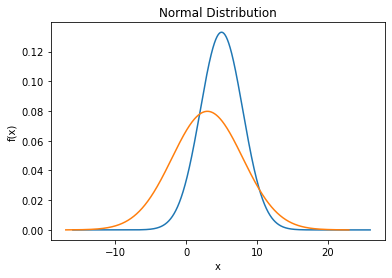

In [46]:
### Declare A and B to be 2 normal random variable with their 
### respective means and standard deviations

mean_A = 5
std_A = 3
A = stats.norm(mean_A, std_A) 

mean_B = 3
std_B = 5
B = stats.norm(mean_B, std_B) 

### get PDF values from both distributions from evenly spaced values 
### within a given interval 

x_A = np.arange((mean_A-7*std_A), (mean_A+7*std_A), 0.01)
x_B = np.arange((mean_B-4*std_B), (mean_B+4*std_B), 0.01)

pdf_A = A.pdf(x_A)
pdf_B = B.pdf(x_B)

### plot the two PDF's
plt.plot(x_A, pdf_A)
plt.plot(x_B, pdf_B)

### Annotate the plot
plt.title('Normal Distribution')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend

plt.show()

### 1.(b)	Generate 1000 random data from each distribution

1000 random data from $N(5,3^2)$

In [47]:
data_A = A.rvs(1000)          # Gets 1000 random samples from A
data_A

array([ 2.8456151 ,  8.18127737,  5.39743859,  2.69238824,  1.94771582,
        7.92040051, 10.73779773, 12.958839  ,  4.39394893,  7.22476745,
        4.75324259,  3.16612153,  4.63159451,  9.4264488 ,  5.68836365,
       11.14933831,  2.05382617,  3.945203  ,  9.8716806 ,  7.05561213,
        1.25575114,  5.20376209, -1.85886754,  9.75336051,  1.12625887,
        3.48693695,  5.02322837,  6.15020966,  5.09778314,  9.64329363,
        7.52885151,  6.64605195, 11.25221126,  6.16141179,  1.38457378,
        3.16983409,  6.08429982,  3.28053789,  4.95088936,  1.20417938,
        6.01638989, -0.99430484,  6.96235446,  5.9270815 ,  2.2265047 ,
        9.37329928,  0.67843863, 11.82130056,  6.69322138,  0.4420743 ,
        5.76209312, -0.44316052,  1.13636863,  8.60587911,  1.99426877,
        4.43880947,  6.24343465,  2.25406244,  7.22951339,  6.18781523,
        4.22679497,  4.8637685 ,  5.26169322,  9.91502105,  6.33017679,
        4.09781688,  3.70561845, -0.49118258,  7.05645826,  9.49

1000 random data from $N(3,5^2)$

In [48]:
data_B = B.rvs(1000)          # Gets 1000 random samples from B
data_B

array([ 6.22459766e+00,  1.08162113e+01,  8.85424983e+00,  5.37503888e+00,
        1.15943411e+00, -3.70760246e+00, -2.17999074e+00,  1.41467554e-01,
        8.25764153e+00,  6.13385980e+00, -5.22206741e+00,  5.78251899e+00,
        7.21893441e-01,  9.42837673e-01,  3.85628340e-01,  7.83727613e+00,
        1.86910805e+00,  5.47386515e-01,  4.02493177e+00,  5.10773220e+00,
       -2.64108283e+00,  4.63544451e+00, -1.17233255e+01,  7.71665694e+00,
       -2.89669474e+00,  1.03088964e+01, -4.71736964e+00, -6.53181329e-01,
        1.88192705e+00,  2.95644279e+00, -6.63437885e+00,  3.23373457e+00,
        4.70115533e+00,  1.07668472e+01,  1.54108247e+01,  2.85817718e+00,
        3.66117962e+00,  7.36095420e+00,  7.46809859e-02,  4.29642177e+00,
       -4.72899262e+00, -4.70912444e+00,  6.58332600e+00,  3.34183736e+00,
       -1.09309139e+00,  5.52865448e+00, -1.25312197e+00, -6.39722841e+00,
        6.25160659e+00,  6.61624818e-01,  5.88452236e+00,  3.23864683e+00,
       -2.50638770e-01,  

### 1.(c)	Calculate the standard error of the mean of these 2 sets of data

standard error of mean for data_A

In [49]:
sem_A = sem(data_A)
sem_A

0.09719420274926234

In [50]:
sem_B = sem(data_B)
sem_B

0.1707120696228009

### 1.(d)	Plot the histogram of these 2 sets of data

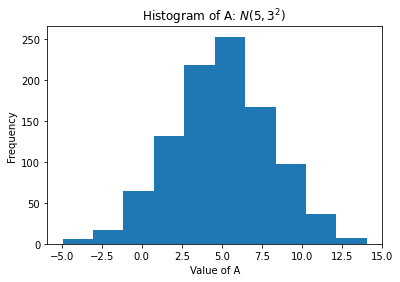

In [51]:
plt.hist(data_A)
plt.title('Histogram of A: $N(5,3^2)$ ')
plt.ylabel('Frequency')
plt.xlabel('Value of A');

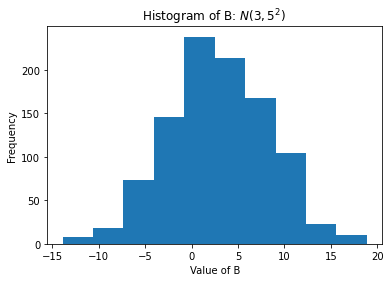

In [52]:
plt.hist(data_B)
plt.title('Histogram of B: $N(3,5^2)$ ')
plt.ylabel('Frequency')
plt.xlabel('Value of B');

### 1.(e)	From the PDF, calculate the 2 intervals containing 95% of these 2 set of data

In [53]:
intervals_A = A.interval(0.95)
intervals_A

(-0.8798919536201621, 10.879891953620163)

In [54]:
intervals_B = B.interval(0.95)
intervals_B

(-6.799819922700269, 12.79981992270027)

### 1.(f)	A production line manufactures 1000-ohm(Ω) resistors that have 10% tolerance. Let X denote the resistance of a resistor. Assuming that X is a normal r.v. with mean 1000 and variance 2500, find the probability that a resistor picked at random will be rejected.

$A∼N(μ=1000,σ^2=50^2)$

The tolerance for the resistor is 10% which is 100 Ω’s.
Therefore, the lower bound of the tolerance is 900 Ω and upper bound of the tolerance is 1100 Ω

Therefore, an acceptable resistor falls in the following range:
$900≤X≤1100$


In [57]:
mean_X = 1000
std_X = 50
X = stats.norm(mean_X, std_X)

prob_accepted = X.cdf(1100) - X.cdf(900)          # where cdf(1100) represents P(X <= 1100) and cdf(900) represents P(X <= 900)
prob_rejected = 1 - prob_accepted
print(prob_rejected)

0.04550026389635842


## 2. 	**Table 3** Shows the scores in the final examination F and the scores in two preliminary examinations $P_1$ and $P_2$ for 22 students in a statistics course. 


### Table 3. Examination Data: Scores in Final ($F$), First Preliminary ($P_1$) and Second Preliminary ($P_2$) Examinations


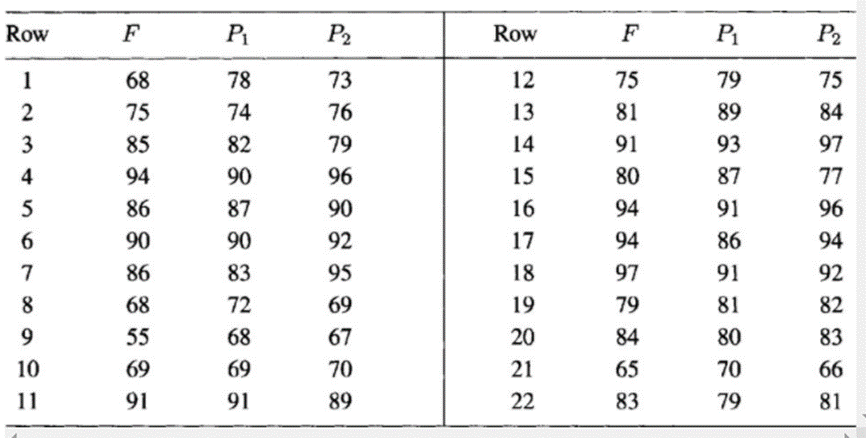

In [3]:
df=pd.read_csv('examination.txt', sep='\t')
df

,F,P1,P2
0,68,78,73
1,75,74,76
2,85,82,79
3,94,90,96
4,86,87,90
5,90,90,92
6,86,83,95
7,68,72,69
8,55,68,67
9,69,69,70


### 2.(a) Fit each of the following models to the data:

\begin{equation} \text{Model 1: }F= β_0+β_1 P_1 +.... ϵ\end{equation}

\begin{equation} \text{Model 2: }F= β_0+....β_2 P_2 +ϵ\end{equation}

\begin{equation} \text{Model 3: }F= β_0+β_1 P_1 +β_2 P_2+ϵ\end{equation}

\begin{equation} \text{Model 1: }F= β_0+β_1 P_1 +.... ϵ\end{equation}

In [4]:
model_1 = smf.ols('F ~ P1', df).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     81.14
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           1.78e-08
Time:                        17:28:16   Log-Likelihood:                -65.930
No. Observations:                  22   AIC:                             135.9
Df Residuals:                      20   BIC:                             138.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.3424     11.564     -1.932      0.0

Fitted Model for Model 1:

\begin{equation} \text{Model 1 (Fitted): }F = 1.2605P_1 -22.3424 \end{equation}

\begin{equation} \text{Model 2: }F= β_0+....β_2 P_2 +ϵ\end{equation}

In [5]:
model_2 = smf.ols('F ~ P2', df).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     122.9
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           5.44e-10
Time:                        17:28:19   Log-Likelihood:                -62.128
No. Observations:                  22   AIC:                             128.3
Df Residuals:                      20   BIC:                             130.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8535      7.562     -0.245      0.8

Fitted Model for Model 2:

\begin{equation} \text{Model 2 (Fitted): }F = 1.00435P_2 -1.8535 \end{equation}

\begin{equation} \text{Model 3: }F= β_0+β_1 P_1 +β_2 P_2+ϵ\end{equation}

In [6]:
model_3 = smf.ols('F ~ P1 + P2', df).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     74.07
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           1.07e-09
Time:                        17:28:24   Log-Likelihood:                -59.840
No. Observations:                  22   AIC:                             125.7
Df Residuals:                      19   BIC:                             129.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.5005      9.236     -1.570      0.1

Fitted Model for Model 3:

\begin{equation} \text{Model 3 (Fitted): }F = 0.4883P_1 + 0.6720P_2 -14.5005 \end{equation}


### 2.(b) Test whether $β_0=0$ in each of the 3 models.                           

**Model 1:** 

For Model 1,the p-value associated with $β_0$ is 0.068. This is greater than the significance level 0.05. A p-value higher than 0.05 is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis that $β_0 = 0$ and reject the alternative hypothesis that $β_0 \neq 0$

**Model 2:** 

For Model 2,the p-value associated with $β_0$ is 0.809. This is greater than the significance level 0.05. A p-value higher than 0.05 is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis that $β_0 = 0$ and reject the alternative hypothesis that $β_0 \neq 0$

**Model 3:** 

For Model 3, the p-value associated with $β_0$ is 0.133. This is greater than the significance level 0.05. A p-value higher than 0.05 is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis that $β_0 = 0$ and reject the alternative hypothesis that $β_0 \neq 0$. The p-values of both the F-statistic as well as the p-values of the individual t-statistics are both significant indicating that both the overall model and the individual predictors are significant



### 2.(c) 	Which variable individually, $P_1$  or $P_2$, is a better predictor of F? Why?                                                                  

$P_2$ is the better predictor of F. Model 2, which has only $P_2$ as the predictor has a higher R-squared at 0.860 compared to Model 1, which has only $P_1$ as the predictor with R-squared of 0.802 and  This means that Model 2  which has only $P_2$ as the predictor accounts for 86% of the total variation in Examination score, F compared to  Model 1  which has only $P_1$ as the predictor and accounts for 80.2% of the total variation in Examination score, F.

Furthermore, the Ajusted R-squared of Model 2, which has only $P_2$ as the predictor is higher at 0.853 compared to the Ajusted R-squared of Model 1, which has only $P_1$ as the predictor at 0.792. This implies Model 2, which has only $P_2$ as the predictor is a better fit than Model 1  which has only $P_1$

### 2.(d)	Which of the three models would you use to predict the final examination scores for a student who scored 78 and 85 on the first and second preliminary examinations, respectively? What is your prediction in this case?


Model 3 is the Model i would use to predict the final examination scores. after being fitted, Model 3 has the highest R-squared and Ajusted R-squared of all the 3 models meaning it accounts for the most variation in the Examination score, F, and is the best fitted model even after being adjusted.

Fitted Model for Model 3:

\begin{equation} \text{Model 3 (Fitted): }F = 0.4883P_1 + 0.6720P_2 -14.5005 \end{equation}

for a student who scored 78 and 85 on the first and second preliminary examinations, Model 3 predicts the following Final Examination score:

\begin{equation} F = 0.4883(78) + 0.6720(85) -14.5005 \end{equation}
\begin{equation} F = 81.2024 \end{equation}
\begin{equation} F \approx81 \end{equation}

### 3.	 Consider the computer repair data discussed in contact week 1. In a second sampling period, 10 more observations on the variables Minutes and Units were obtained. Since all observations were collected by the same method from a fixed environment, all 24 observations were pooled to form one data set. The data appear in Table 4 and is also provided in expanded computer repair data.txt. 

Table 4. Expanded Computer Repair Times Data: length of service (Minutes) and number of units repaired (Units)

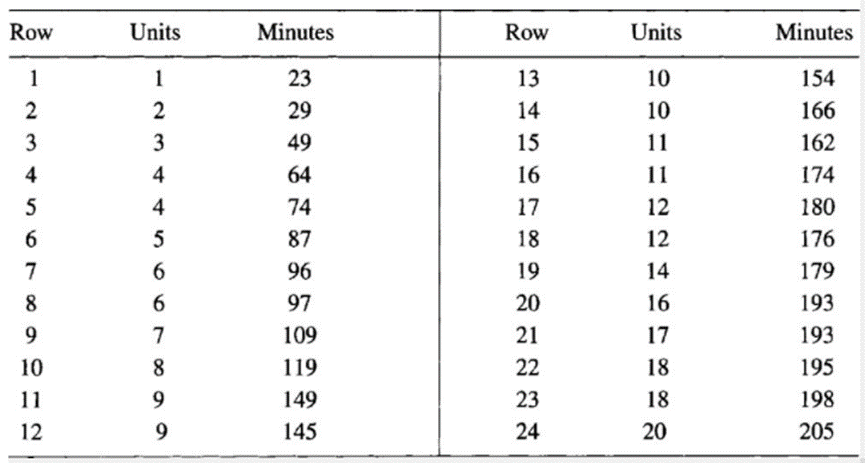

In [7]:
df=pd.read_csv('expanded computer repair data.txt', sep='\t')
df

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74
5,5,87
6,6,96
7,6,97
8,7,109
9,8,119


### 3.(a)	 Fit a linear regression model relating Minutes to Units.

\begin{equation} \text{Model: }Minutes= β_0+β_1Units +.... ϵ\end{equation}

In [8]:
model = smf.ols('Minutes ~ Units', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Minutes   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     190.7
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           2.56e-12
Time:                        17:32:26   Log-Likelihood:                -103.36
No. Observations:                  24   AIC:                             210.7
Df Residuals:                      22   BIC:                             213.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2127      7.985      4.660      0.0

\begin{equation} \text{Model(Fitted): }Minutes = 9.9695Units + 37.2127 \end{equation}

### 3.(b)	 Check each of the standard regression assumptions and indicate which assumption(s) seems to be violated.

**1) Linearity assumption: The model that relates the response variable to the predictor variables is linear**

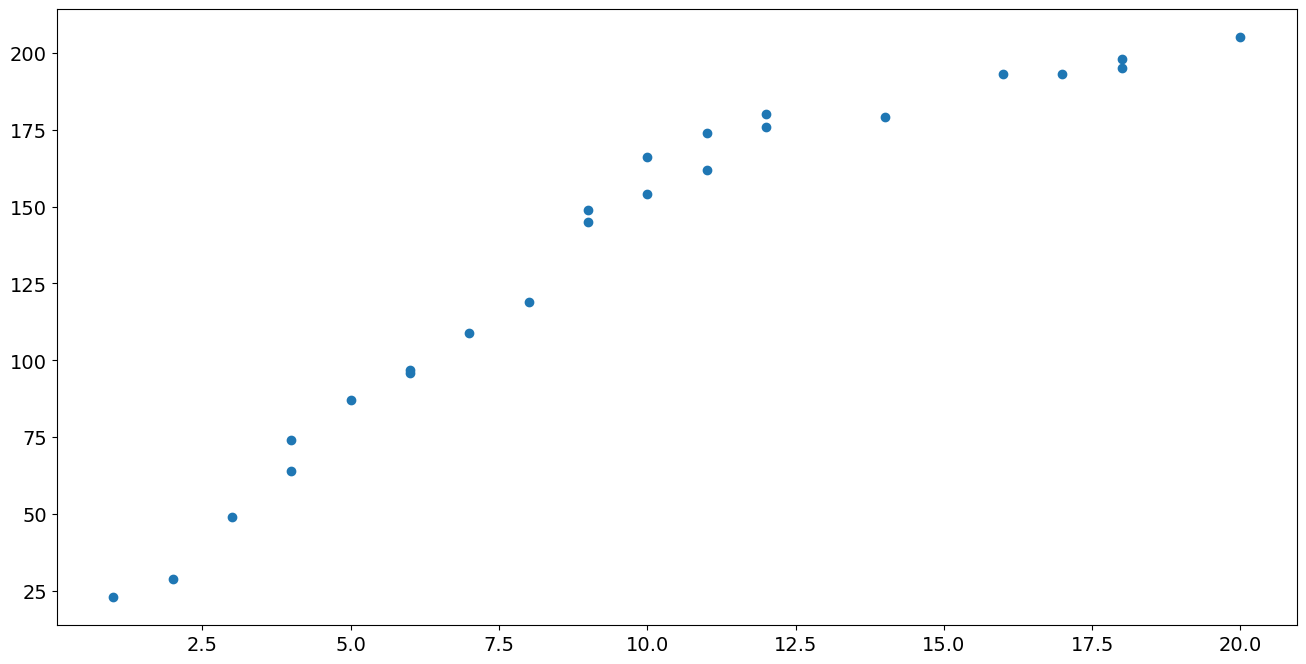

In [21]:
plt.scatter(df['Units'], df['Minutes'])

The pattern of data points on the scatter plot do not appear to be entirely linear i.e. the slope is initially high for 1 unit to 12 units then the slope lowers from 12 units to 15 units. This suggests that the linearity assumption may be violated.

**2) Assumptions about the errors (residuals)**

In [22]:
residuals = model.resid
residuals

0    -24.182233
1    -28.151738
2    -18.121242
3    -13.090746
4     -3.090746
5     -0.060251
6     -1.029755
7     -0.029755
8      2.000741
9      2.031236
10    22.061732
11    18.061732
12    17.092228
13    29.092228
14    15.122724
15    27.122724
16    23.153219
17    19.153219
18     2.214211
19    -3.724798
20   -13.694302
21   -21.663806
22   -18.663806
23   -31.602815
dtype: float64

In [23]:
fitted_values = model.fittedvalues
fitted_values

0      47.182233
1      57.151738
2      67.121242
3      77.090746
4      77.090746
5      87.060251
6      97.029755
7      97.029755
8     106.999259
9     116.968764
10    126.938268
11    126.938268
12    136.907772
13    136.907772
14    146.877276
15    146.877276
16    156.846781
17    156.846781
18    176.785789
19    196.724798
20    206.694302
21    216.663806
22    216.663806
23    236.602815
dtype: float64

**2.1) The errors have a normal distribution**

<u>Probability plot of residuals</u>

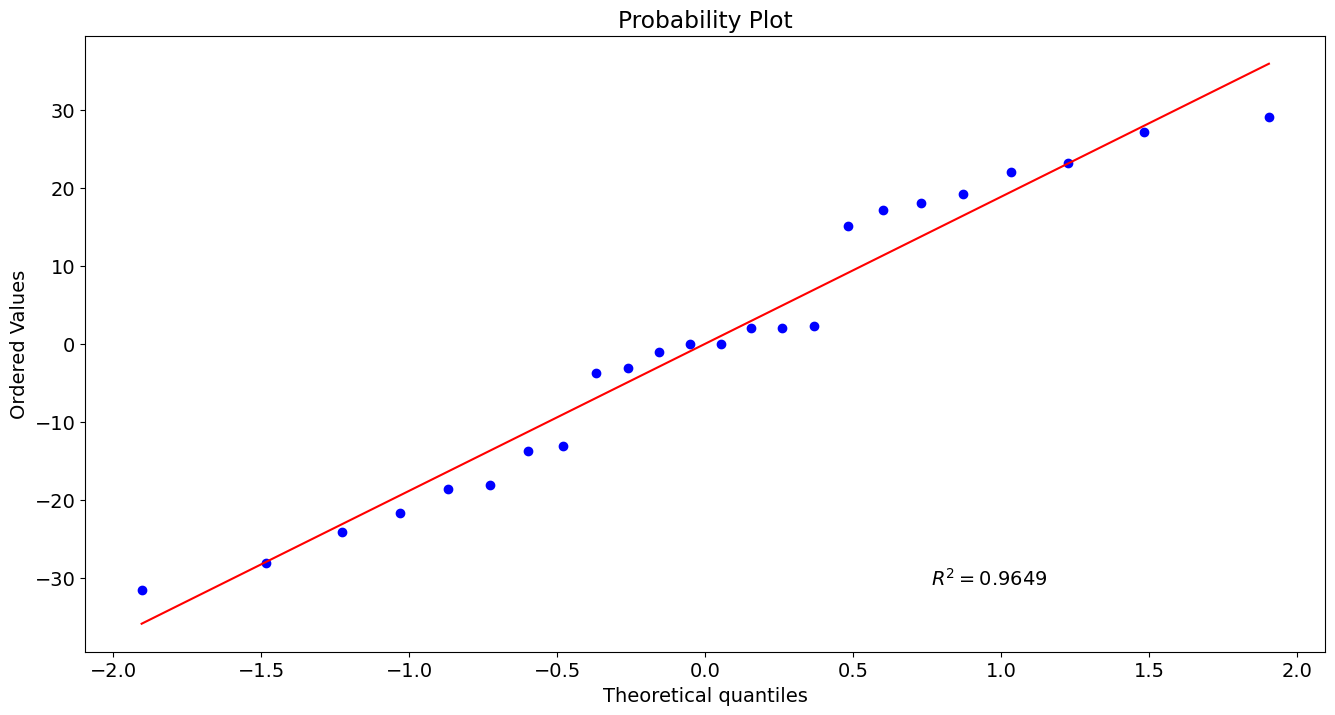

In [24]:
_=stats.probplot(model.resid, plot=plt,rvalue=True)

The probability plot plots the residuals against the quantiles of a the normal distribution and calculates a best-fit line for the data. If the datapoints fall on this line, the distribution can be considered normal.

We find that the points generally lie along the line although there are some points that depart from the line and there appear to be sudden 'jumps' between successive clusters of data points. This requires further investigation

<u>Histogram of residuals</u>

(array([2., 2., 3., 1., 2., 6., 0., 1., 4., 3.]),
 array([-31.60281499, -25.5333107 , -19.46380641, -13.39430212,
         -7.32479783,  -1.25529354,   4.81421075,  10.88371504,
         16.95321933,  23.02272362,  29.09222792]),
 <BarContainer object of 10 artists>)

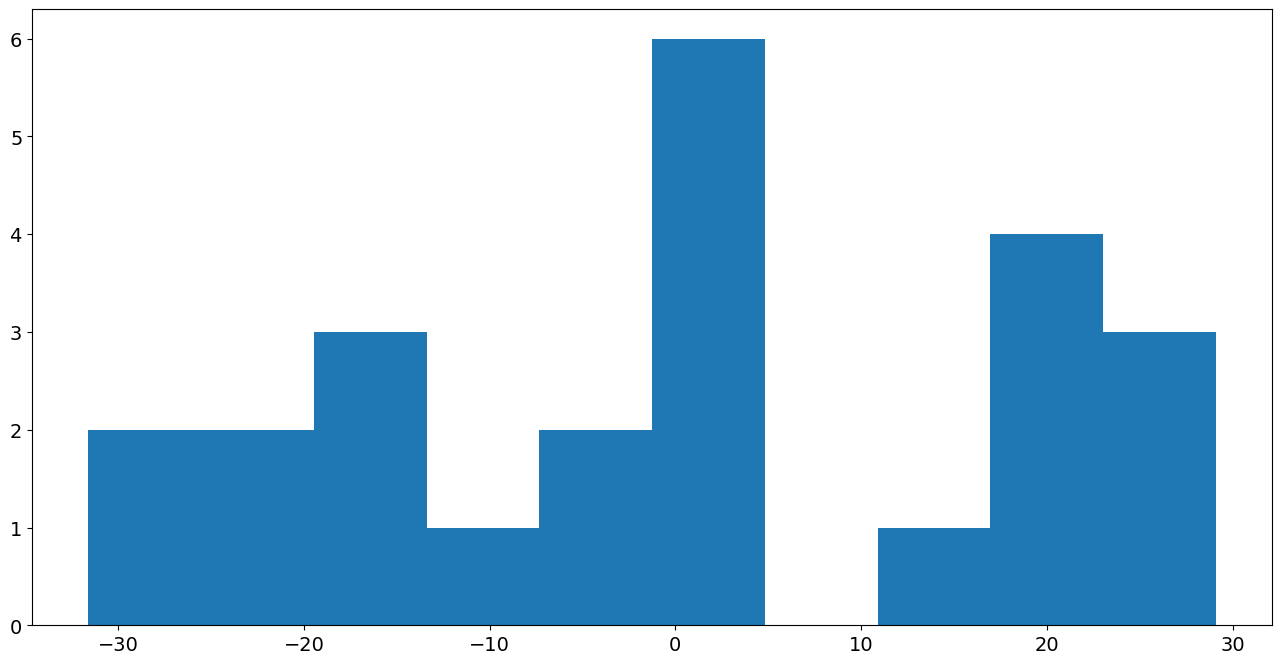

In [25]:
plt.hist(residuals)

The histogram above shows gaps between the bars of the historgram and a lack of symmetry. The shape of this distribution does not match the bell shape curve of a normal distribution. This suggests that the data is not normally distributed however a lack  of sufficient data points may also play a role in the distribution not looking normal.

<u>Omnibus test of residuals</u>

The Omnibus test is used to test the null hypothesis that a
distribution is normal. In this case, we are looking at the distribution of the residuals.

We find that Prob(Omnibus) is 0.221. This is greater than 0.05 so we cannot reject the null hypothesis. Thus, the test
demonstrates that the data are normally distributed.

<u>Conclusion</u>

While the histogram does not resemble the bell shaped curve of a normal distribution, this may simply be due to a lack of data points. The probability plot and Omnibus test for the residuals demonstrate the data is normally distributed so we can conclude that the errors/residuals are normally distributed. 

**2.2) The errors/residuals have mean zero**

In [26]:
residuals.mean()

-1.8947806286936004e-14

The mean of the residuals is very small and close to 0. We can therefore assume that the condition of the errors/residuals having a mean of 0 is satisfied

**2.3) The errors/residuals have constant variance (homoscedasticity)**

Text(0.5, 1.0, 'Residuals vs Units')

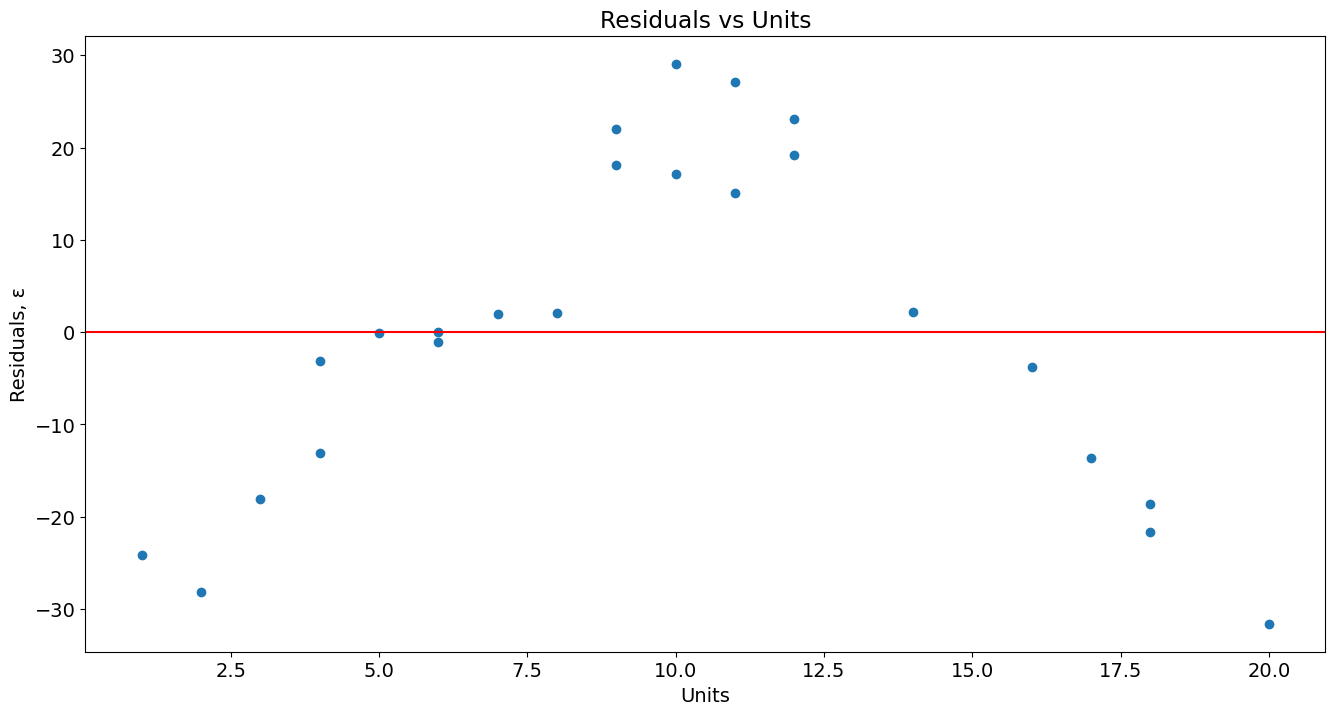

In [27]:
plt.scatter(df['Units'], residuals)
plt.axhline(y=0, color = 'red')
plt.xlabel('Units')
plt.ylabel('Residuals, ε')
plt.title('Residuals vs Units')

Text(0.5, 1.0, 'Residuals vs Fitted Values, ŷ')

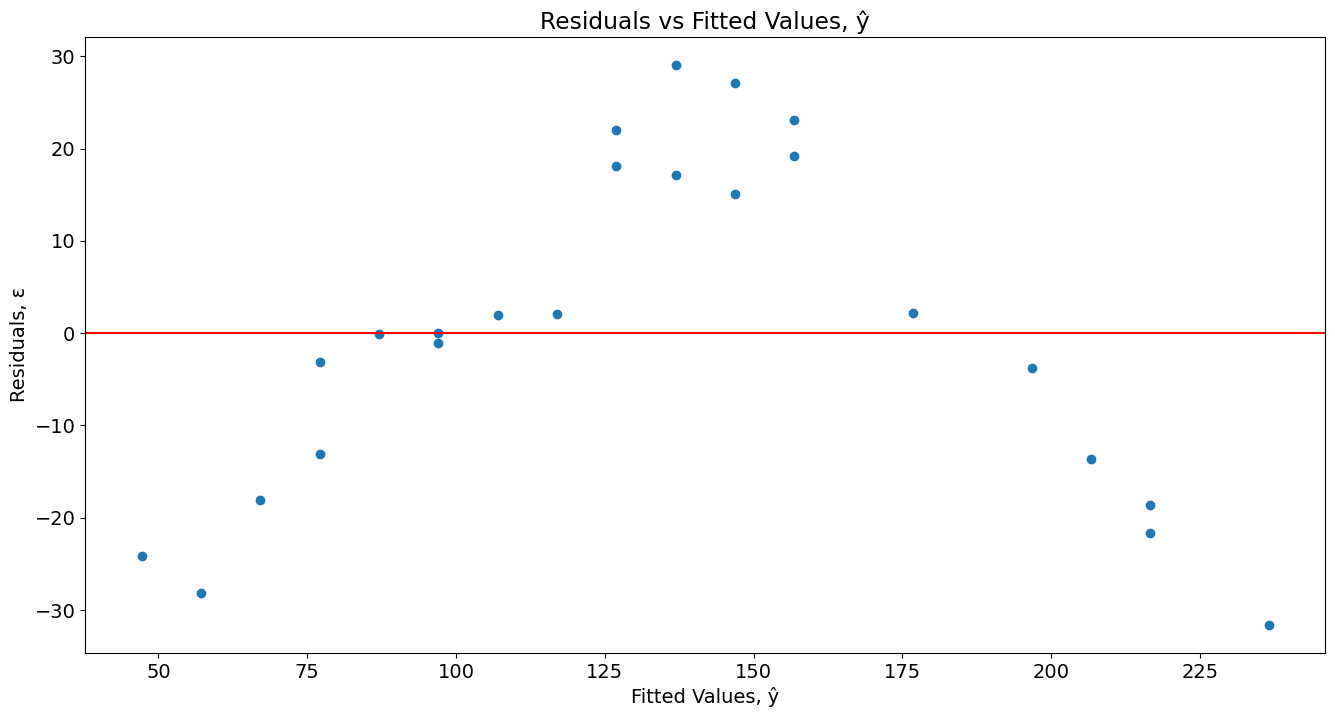

In [28]:
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color = 'red')
plt.xlabel('Fitted Values, ŷ')
plt.ylabel('Residuals, ε')
plt.title('Residuals vs Fitted Values, ŷ')

While homoscedasticity is satisfied, we fnd there is a pattern being shown by the residuals. For low values of Units or Fitted values, the residuals are negative. For mid values of Units or Fitted Values, the residuals are positive and for high values of Units or fitted values, the residuals are negative. The pattern of the residuals resembles a quadratic curve where the coefficient of the squared term is negative. 

This indicates that the linear regression model may not be suitable.

**2.4) The errors/residuals are independant of eachother**

Text(0, 0.5, 'i')

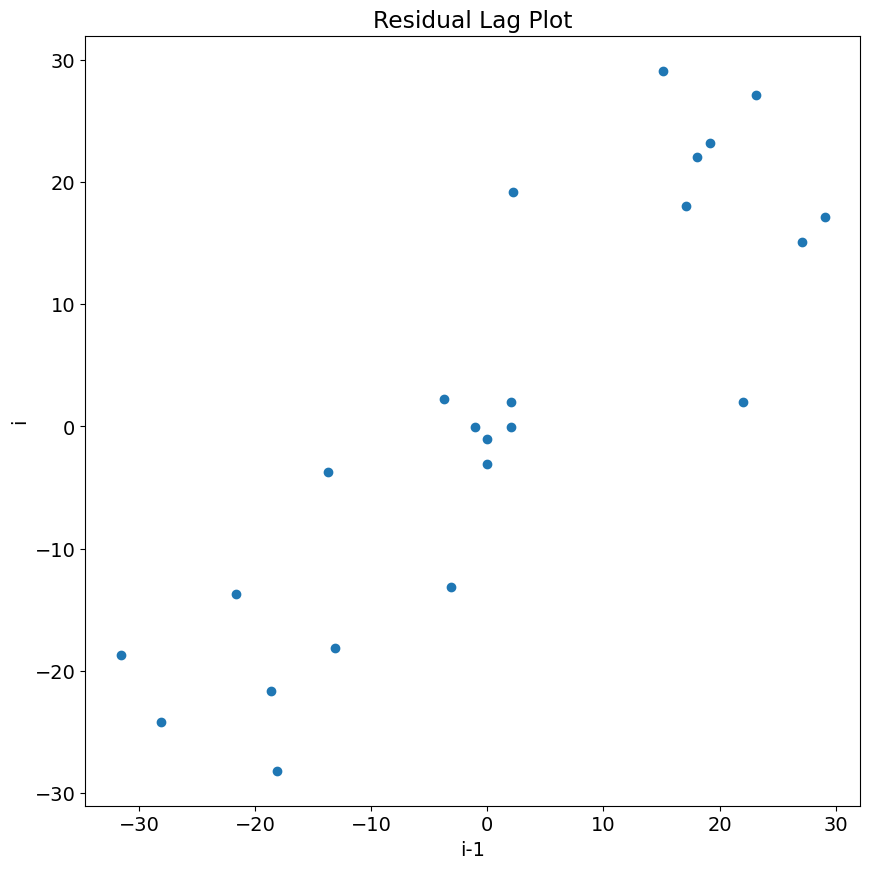

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.scatter(model.resid[1:], model.resid[:-1])
plt.title('Residual Lag Plot')
plt.xlabel('i-1')
plt.ylabel('i')

The Residual Lag Plot has been constructed by plotting residual (i) against residual (i-1)is useful for examining the dependency of the error terms. Any non-random pattern in a lag plot suggests that the variance is not random.

We find in the Residual Lag Plot that there appears to be a linear relationship between residual (i) and residual (i-1) therefore the independance criteria of the risudals is not satisfied

**3) Assumptions about the errors predictors**

**3.1) The values of the predictors are measured without error**

This assumption is hardly ever satisfied. As these errors are rarely known, there may be some measurement errors from the estimated regression coefficients.

**3.2) The predictor variables are assumed to be linearly independant of eachother**

There is only one predictor variable in this model so we do not need to check for independance in this scenario however, if there were more predictor variables, we could compare the correlations between the variables to see check for independance.

**4) Assumptions about the observations**

All observations are equally reliable and have an approximately equal role in determining the regression results and in influencing conclusions.

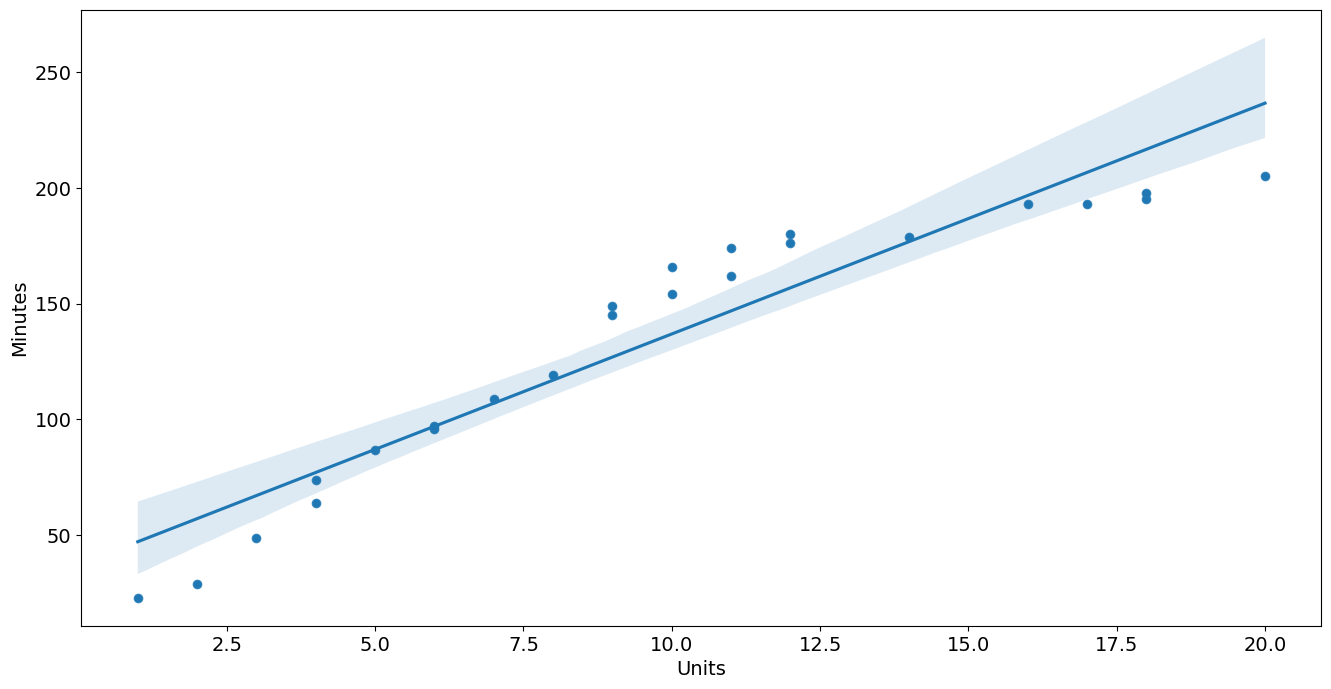

In [30]:
sns.scatterplot(x='Units', y='Minutes', data=df)
sns.regplot(x='Units', y='Minutes', data=df)
plt.show()


### 4. The O-rings in the booster rockets used in space launching play an important part in preventing rockets from exploding. Probabilities of O-ring failures are thought to be related to temperature. Each flight has six O-rings that could be potentially damaged in a particular flight. The data from 23 flights are given in Table 5 and is also provided in spaceshuttle.txt. For each flight we have the number of O-rings damaged and the temperature of the launch.

**Table 5. Number of O-rings Damaged and Temperature (Degrees Fahrenheit) at Time of Launch for 23 Flights of Space Shuttle Challenger.**

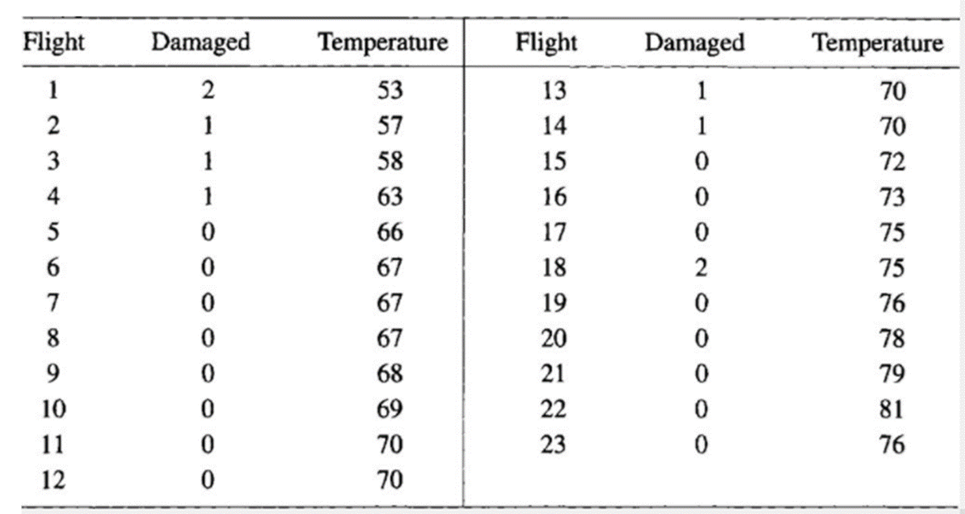

### 4.(a) Fit a logistic regression connecting the probability of O-rings failure (2 or 1 damaged are both considered as failures) with temperature. Interpret the coefficients. 

In [31]:
df=pd.read_csv('spaceshuttle.txt', sep='\t')
df = df[['Temp', 'Damaged']]
df

,Temp,Damaged
0,53,2
1,57,1
2,58,1
3,63,1
4,66,0
5,67,0
6,67,0
7,67,0
8,68,0
9,69,0


we are told that 2 or 1 damaged O-rings are still considered as failures. Thus we can replace the damaged column with an outcome column where 1 is a failure and 0 is not a failure

In [32]:
df['Outcome'] = np.where(df['Damaged']>=1, 1, 0)
df

,Temp,Damaged,Outcome
0,53,2,1
1,57,1,1
2,58,1,1
3,63,1,1
4,66,0,0
5,67,0,0
6,67,0,0
7,67,0,0
8,68,0,0
9,69,0,0


In [33]:
df = df.drop('Damaged', axis=1)
df

,Temp,Outcome
0,53,1
1,57,1
2,58,1
3,63,1
4,66,0
5,67,0
6,67,0
7,67,0
8,68,0
9,69,0


In [34]:
logit = smf.logit('Outcome~Temp', df).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.2813
Time:                        17:50:37   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
Covariance Type:            nonrobust   LLR p-value:                  0.004804
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0429      7.379      2.039      0.041       0.581      29.505
Temp          -0.2322      0.

The relationship between the probability 𝜋 and X can often be represented by a logistic regression function.

The shape of the S-curve given in Figure 8.1 can be reproduced if we model the probabilities as follows:
    

\begin{multline}
  \pi
 = \frac{\exp(\beta_{0} + \beta_{1}x)}{1 + \exp(\beta_{0} + \beta_{1}x)} \label{eq:glm1} 
\end{multline}

It has nonlinear regression paranmeters $\beta_0, \beta_1 .... \beta_p$ however, it can be linearized by the logit
transformation.

Taking the natural logarithm of the odds ratio gives the following 

\begin{equation} g(x_1, ...x_p) = log(\frac{\pi}{1-\pi}) = \beta_0 + \beta_1x_1 + .... + \beta_p x_p  \end{equation}

The logarithm of the odds ratio is called the logit. The logit transformation produces a linear function of parameters $\beta_0, \beta_1 .... \beta_p$

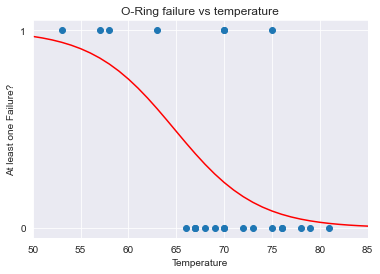

In [40]:
# Plot the curve
beta_0 = logit.params[0]
beta_1 = logit.params[1]
x = np.arange(50, 90)
Pi = np.exp(np.dot(beta_1, x) + beta_0)/ (1.0 + np.exp(np.dot(beta_1, x) + beta_0))

# Plot the original data
plt.scatter(df['Temp'], df['Outcome'])
plt.xlim([50, 85])
plt.yticks([0, 1])
plt.ylabel("At least one Failure?")
plt.xlabel("Temperature")
plt.title("O-Ring failure vs temperature")
plt.tight_layout

plt.plot(x, Pi,'r')
plt.show()

<u>Interpretation of the coeffieicients</u>

The coefficient of Temp is -0.2322. This means that for a unit increase in Temp, the expected change in the logit when
the other variables are held fixed is -0.2322.

\begin{equation} \frac{Pr(Failure)}{Pr(No Failure)} = \frac{\pi}{1-\pi} = exp(\beta_0 + \beta_1x_1 + .... + \beta_p x_p)  \end{equation}

for unit increase in Temp, the relative odds of $\frac{Pr(Failure)}{Pr(No Failure)}$ is multiplied by $ e^{\beta_1} = e^{-0.2322}=0.793$


This means that for a unit increase in Temp, the expected change in the odds ratio when
the other variables are held fixed is a decrease of about 21%. Thus, the odds of an O-ring failure decrease by 21% for every 1 degree increase in temperature

### 4.(b) The data for Flight 18 that was launched when the launch temperature was 75 degrees Fahrenheit was thought to be problematic and was deleted. Fit a logistic regression to the reduced data set. Interpret the coefficients. 

In [35]:
df

,Temp,Outcome
0,53,1
1,57,1
2,58,1
3,63,1
4,66,0
5,67,0
6,67,0
7,67,0
8,68,0
9,69,0


due to Python's 0 indexing, flight 18 corresponds to row index 17. This row will need to be removed

In [38]:
df_2 = df.drop(labels=17, axis=0)
df_2

,Temp,Outcome
0,53,1
1,57,1
2,58,1
3,63,1
4,66,0
5,67,0
6,67,0
7,67,0
8,68,0
9,69,0


In [40]:
logit_2 = smf.logit('Outcome~Temp', df_2).fit()
print(logit_2.summary())

Optimization terminated successfully.
         Current function value: 0.326749
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                   22
Model:                          Logit   Df Residuals:                       20
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.4424
Time:                        17:57:39   Log-Likelihood:                -7.1885
converged:                       True   LL-Null:                       -12.891
Covariance Type:            nonrobust   LLR p-value:                 0.0007325
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.4033     11.832      1.978      0.048       0.214      46.593
Temp          -0.3610      0.

<u>Interpretation of the coeffieicients</u>

The coefficient of Temp is -0.3610. This means that for a unit increase in Temp, the expected change in the logit when
the other variables are held fixed is -0.3610.

\begin{equation} \frac{Pr(Failure)}{Pr(No Failure)} = \frac{\pi}{1-\pi} = exp(\beta_0 + \beta_1x_1 + .... + \beta_p x_p)  \end{equation}

For a unit increase in Temp, the relative odds of $\frac{Pr(Failure)}{Pr(No Failure)}$ is multiplied by $ e^{\beta_1} = e^{-0.3610}=0.697$


This means that for a unit increase in Temp, the expected change in the odds ratio when
the other variables are held fixed is a decrease of about 30%. Thus, the odds of an O-ring failure decrease by 30% for every 1 degree increase in temperature. The reduced dataset suggests that the odds of an O-ring failure decreases even further for every 1 degree increase in temperature,

### 4.(c) From the fitted model in (b), find the probability of an O-ring failure when the temperature at launch was 31 degrees Fahrenheit. This was the temperature forecast for the day of the launching of the fatal Challenger flight on January 20, 1986.  

In [43]:
predictions = logit_2.predict()
predictions
#print(type(predictions))

array([0.98620005, 0.94401775, 0.92158569, 0.65903225, 0.39554126,
       0.31322192, 0.31322192, 0.31322192, 0.24119845, 0.18136285,
       0.13375452, 0.13375452, 0.13375452, 0.13375452, 0.06977154,
       0.04967865, 0.02476452, 0.0173905 , 0.00852382, 0.00595619,
       0.00290216, 0.0173905 ])

In [44]:
df_2['pred']= predictions
df_2['Outcome (pred)'] = [ 0 if x < 0.5 else 1 for x in predictions]
df_2

,Temp,Outcome,pred,Outcome (pred)
0,53,1,0.986200,1
1,57,1,0.944018,1
2,58,1,0.921586,1
3,63,1,0.659032,1
4,66,0,0.395541,0
5,67,0,0.313222,0
6,67,0,0.313222,0
7,67,0,0.313222,0
8,68,0,0.241198,0
9,69,0,0.181363,0


In [45]:
prediction= logit_2.predict(pd.DataFrame({'Temp': [31]}))
prediction[0]

0.9999950278598405

This is equiavalent of \begin{multline}
  \pi
 = \frac{\exp(\beta_{0} + \beta_{1}x)}{1 + \exp(\beta_{0} + \beta_{1}x)} = \frac{\exp(23.4033049317693+(-0.36102095835444603)(31))}{1 + \exp(23.4033049317693+(-0.36102095835444603)(31))} = 0.9999950278598405
\end{multline}

### 4.(d)	Would you have advised the launching on that particular day?

Based on the fitted model in 4.(b), the probbility of on O-ring failing at a launch temperature of 31 degrees is 0.9999950278598405. This probability is very close to 1 so it is almost certain that an O-ring will fail. The launching should not have gone ahead.

### 5. Per-students costs (in £) for daily expense on food in universities in three areas are shown in table 6. 

**Table 6. Daily food expenses**

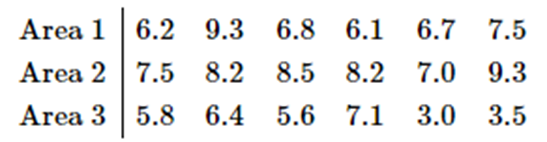

### 5.(a)	Build up an ANOVA table to test the claim that there is a difference in means for the three areas at a 0.05 significance level. 

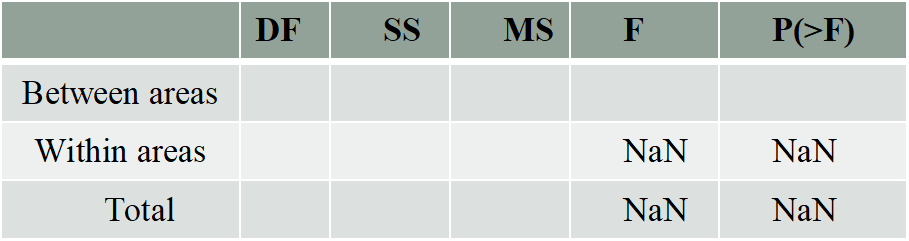

In [54]:
df = pd.read_csv('Daily food expenses.csv')
df

,Area,Costs
0,Area 1,6.2
1,Area 1,9.3
2,Area 1,6.8
3,Area 1,6.1
4,Area 1,6.7
5,Area 1,7.5
6,Area 2,7.5
7,Area 2,8.2
8,Area 2,8.5
9,Area 2,8.2


In [51]:
df.dtypes

Area      object
Costs    float64
dtype: object

In [55]:
group_1 = df[df['Area']=='Area 1']['Costs']
group_2 = df[df['Area']=='Area 2']['Costs']
group_3 = df[df['Area']=='Area 3']['Costs']

F_statistic, pVal = stats.f_oneway(group_1, group_2, group_3)
print(F_statistic, pVal)

8.175929203539821 0.003969262075918711


In [56]:
model = smf.ols('Costs ~ C(Area)', df).fit()
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)


ANOVA results
            df     sum_sq    mean_sq         F    PR(>F)
C(Area)    2.0  25.663333  12.831667  8.175929  0.003969
Residual  15.0  23.541667   1.569444       NaN       NaN


Both the one-way ANOVA table and the one-way F-test show a large F-statistic of 8.175929 and its corresponding p-value of 0.003969. We can therefore reject the null hypothesis and conclude that there is a difference in means for the three areas at the 0.05 significance level

### 5.(b)	Do T tests pairwisely to areas 1, 2 and 3 to determine where the difference in means lies among the 3 areas at a 0.05 significance level. (You are allowed to run these T tests in python and present the outcome to help you answer this question).

In [57]:
t_statistic, pVal = stats.ttest_ind(group_1, group_2)
print('p-value of t-test for group 1 and group 2 is {}'.format(pVal))

t_statistic, pVal = stats.ttest_ind(group_1, group_3)
print('p-value of t-test for group 1 and group 3 is {}'.format(pVal))

t_statistic, pVal = stats.ttest_ind(group_2, group_3)
print('p-value of t-test for group 2 and group 3 is {}'.format(pVal))

p-value of t-test for group 1 and group 2 is 0.11258411897622513
p-value of t-test for group 1 and group 3 is 0.046867512641904654
p-value of t-test for group 2 and group 3 is 0.0030093208658948226


### 5.(c)	Give your comments by comparing your answer to question (a) and (b).

The t-test is used to compare the means between two groups of data whereas the ANOVA is used to compare the means among 3 or more groups. The p-value from the F-test from the ANOVA table suggests that overall there is a difference in means for all the areas. The t-test however, gives a more closer look. We find that when comparing two groups at a time, while the p-values for the t-tests between groups 1 and 3 and groups 2 and 3 are significant, the the p-value for the t-test between groups 1 and 2 is not. The F-test however concluded that overall, there is a difference in means. A significant p-value from the ANOVA test indicates for atleast one pair of groups, the difference in mean is statistically significant. This is what we have found as the individual t-tests between pairs of different groups have indicated that 2 of 3 differences are statistically significant. If a tester just wants to know if there is a significant difference between the means of the different groups, they could rely on the ANOVA method. If however, they wanted to know between what exact groups the differences are significant, they could rely on doing t-tests for all group combinations although this may be time consuming.